import os,shutil

base_dir='C:/Karthik/Analytics/dataset/Fire/frames'


In [3]:
train_dir=os.path.join(base_dir,'train')

In [9]:
validation_dir=os.path.join(base_dir,'validation')

In [5]:
train_fire_dir=os.path.join(train_dir,'fire')

In [6]:
train_nofire_dir=os.path.join(train_dir,'nofire')

In [10]:
validation_fire_dir=os.path.join(validation_dir,'fire')
validation_nofire_dir=os.path.join(validation_dir,'nofire')

In [11]:
print('training fire',len(os.listdir(train_fire_dir)))
print('training nofire',len(os.listdir(train_nofire_dir)))
print('Validation fire',len(os.listdir(validation_fire_dir)))
print('Validation nofire',len(os.listdir(validation_nofire_dir)))

training fire 187
training nofire 128
Validation fire 108
Validation nofire 70


In [12]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [13]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0,5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
train_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')

Found 315 images belonging to 2 classes.


In [17]:
validation_generator=test_datagen.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')

Found 178 images belonging to 2 classes.


In [18]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)


In [19]:
history=model.fit_generator(
train_generator,
steps_per_epoch=10,
epochs=100,
validation_data=validation_generator,
validation_steps=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
10/10 [==============================] - 46s 5s/step - loss: 0.6715 - acc: 0.5950 - val_loss: 0.6307 - val_acc: 0.6010
Epoch 2/100
10/10 [==============================] - 26s 3s/step - loss: 0.6019 - acc: 0.6551 - val_loss: 0.5160 - val_acc: 0.5909
Epoch 3/100
10/10 [==============================] - 26s 3s/step - loss: 0.5312 - acc: 0.6700 - val_loss: 0.4135 - val_acc: 0.6162
Epoch 4/100
10/10 [==============================] - 26s 3s/step - loss: 0.5068 - acc: 0.6942 - val_loss: 0.3035 - val_acc: 0.9343
Epoch 5/100
10/10 [==============================] - 26s 3s/step - loss: 0.4183 - acc: 0.7865 - val_loss: 0.2893 - val_acc: 0.9141
Epoch 6/100
10/10 [==============================] - 26s 3s/step - loss: 0.3961 - acc: 0.8450 - val_loss: 0.2419 - val_acc: 0.9343
Epoch 7/100
10/10 [==============================] - 26s 3s/step - loss: 0.3109 - acc: 0.8782 - val_loss: 0.3021 - val_acc: 0.8283
Epoch 8/100
10/10 [================

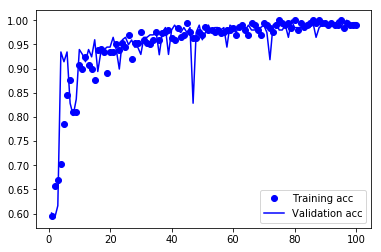

<Figure size 432x288 with 0 Axes>

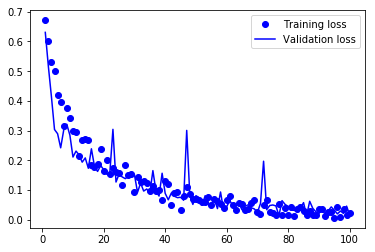

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()
plt.figure()
plt.show()


plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()
plt.figure()
plt.show()

In [22]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [23]:
def pred(p):
    test_image = image.load_img(p, target_size=(150, 150))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    prediction = model.predict(test_image)
    return prediction

In [24]:
train_generator.class_indices

{'fire': 0, 'nofire': 1}

In [35]:
import winsound
frequency = 500  # Set Frequency To 2500 Hertz
duration = 500  # Set Duration To 1000 ms == 1 second

In [54]:
test_dir=os.path.join(base_dir,'test')
import numpy as np
from keras.preprocessing import image

In [57]:
for x in range(0,len(os.listdir(test_dir))):
    our_prediction=pred
    p='C:/Karthik/Analytics/dataset/Fire/frames/test/' +str(x) + '.jpg'
    val=our_prediction(p)
    if val==[[1.]]:
        print(p, "No Fire")
      
        
    else:
       print(p, "!!!!!!!!!FIRE!!!!!!!!")
       winsound.Beep(frequency, duration)
    

C:/Karthik/Analytics/dataset/Fire/frames/test/0.jpg !!!!!!!!!FIRE!!!!!!!!
C:/Karthik/Analytics/dataset/Fire/frames/test/1.jpg !!!!!!!!!FIRE!!!!!!!!
C:/Karthik/Analytics/dataset/Fire/frames/test/2.jpg !!!!!!!!!FIRE!!!!!!!!
C:/Karthik/Analytics/dataset/Fire/frames/test/3.jpg !!!!!!!!!FIRE!!!!!!!!
C:/Karthik/Analytics/dataset/Fire/frames/test/4.jpg !!!!!!!!!FIRE!!!!!!!!
C:/Karthik/Analytics/dataset/Fire/frames/test/5.jpg !!!!!!!!!FIRE!!!!!!!!
C:/Karthik/Analytics/dataset/Fire/frames/test/6.jpg !!!!!!!!!FIRE!!!!!!!!
C:/Karthik/Analytics/dataset/Fire/frames/test/7.jpg !!!!!!!!!FIRE!!!!!!!!
C:/Karthik/Analytics/dataset/Fire/frames/test/8.jpg !!!!!!!!!FIRE!!!!!!!!
C:/Karthik/Analytics/dataset/Fire/frames/test/9.jpg !!!!!!!!!FIRE!!!!!!!!
C:/Karthik/Analytics/dataset/Fire/frames/test/10.jpg !!!!!!!!!FIRE!!!!!!!!
C:/Karthik/Analytics/dataset/Fire/frames/test/11.jpg No Fire
C:/Karthik/Analytics/dataset/Fire/frames/test/12.jpg No Fire
C:/Karthik/Analytics/dataset/Fire/frames/test/13.jpg No Fire
C:

In [44]:
len(os.listdir(test_dir))

27